# Bài tập nhóm số 2
## Nhóm : Nhà Họ Lê
#### Thành Viên
- Lê Thế Phú
- Lê Quang Luân
- Lê Thanh Tuấn
- Lê Phước Chớ
- Lê Đại Minh Phú Quý

### Import thư viện cần thiết

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
import seaborn as sns

#### Câu 1. Tạo 300 điểm dữ liệu với 4 phân cụm, và vẽ lên trục tọa độ. (1 điểm)

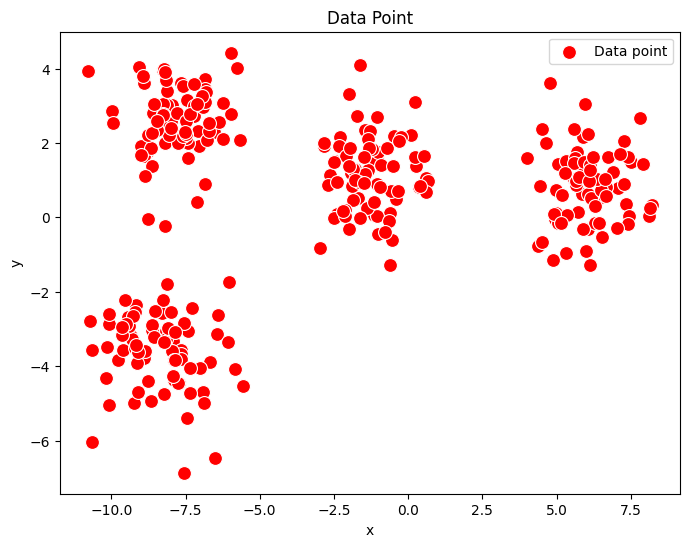

In [87]:

dataSet, _ = make_blobs(n_samples=300,n_features= 2,centers = 4,random_state= 999)
x1 = dataSet[ :, 0]
x2 = dataSet[ :, 1]
plt.figure(figsize=(8,6))
plt.title('Data Point')
plt.xlabel('x')
plt.ylabel('y')
sns.scatterplot(x = x1, 
                y = x2,
                color='red', 
                marker='o',
                s = 100,
                label ='Data point')
plt.show()

#### Câu 2. Viết hàm tính Phân cụm theo format ở slide số 16. 

In [88]:
def shouldStop(oldCentroids, centroids):
    if oldCentroids is None:
        return False
    return set([tuple(a) for a in oldCentroids]) == set([tuple(a) for a in centroids])

def euclidean_distance(data_point, centrois):
    return np.sqrt(np.sum((centrois - data_point) ** 2, axis = 1))

def getLabels(dataSet, centroids):
    Labels = []
    for data in dataSet:
        Distances = [euclidean_distance(data,centroid.reshape(1,-1)) for centroid in centroids]
        Label = np.argmin(Distances)
        Labels.append(Label)
    return Labels

def getCentroids(dataSet, labels, k):
    centroids = np.zeros((k, len(dataSet[0])))
    for n in range(k):
        cluster_data = dataSet[np.where(labels == n)]
        if cluster_data.size > 0:
            centroids[n, :] = cluster_data.mean(axis=0)
        else:
            centroids[n, :] = dataSet[np.random.randint(0, len(dataSet))]
    return centroids
    
def kmeans(dataSet, k):
    numFeatures = len(dataSet[0])
    centroids = dataSet[np.random.choice(dataSet.shape[0] , k, replace= False)]
    oldCentroids = None
    while not shouldStop(oldCentroids, centroids):
        oldCentroids = centroids
        labels = np.array(getLabels(dataSet, centroids))
        centroids = getCentroids(dataSet, labels, k)
    return centroids,labels

#### Câu 3. Chạy hàm tính K-means với dữ liệu ở trên.

In [89]:
Centroids, Labels = kmeans(dataSet, 4)
print(f'Điểm centroids : \n{Centroids}')
print(f'Labels : \n{Labels}')

Điểm centroids : 
[[-8.07333793 -0.4605596 ]
 [-1.26268569  1.14399174]
 [ 6.7226139   1.24299662]
 [ 5.41766502  0.37110346]]
Labels : 
[3 1 3 3 0 1 0 0 2 1 1 0 3 3 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 2 1 1 2 0 1 1
 1 0 2 2 3 0 1 0 0 3 0 0 0 1 1 0 1 0 0 0 1 2 0 0 0 2 0 3 0 0 0 0 0 0 2 3 0
 1 1 0 0 2 0 1 0 0 2 0 3 2 2 0 0 0 0 0 0 2 0 1 0 0 0 3 3 2 1 1 1 0 1 0 3 3
 0 0 1 1 0 1 0 0 1 3 1 1 0 1 0 0 0 0 1 0 0 0 3 1 0 0 0 0 0 2 2 0 3 2 3 0 0
 1 3 2 0 0 3 2 3 0 1 1 0 3 2 1 0 0 2 1 0 2 2 0 0 0 0 0 1 0 3 0 1 0 3 2 2 1
 1 0 1 0 1 0 0 2 3 1 3 2 0 3 1 1 0 1 0 1 0 0 3 0 0 1 1 3 2 0 1 0 2 0 0 1 2
 3 2 0 0 3 1 0 1 0 0 0 0 0 1 0 0 0 0 0 2 1 1 3 0 1 1 3 0 0 2 0 0 0 1 2 0 0
 0 3 0 3 2 3 0 0 1 0 0 0 0 0 2 1 0 1 0 0 0 0 0 0 2 1 1 0 1 1 0 0 0 1 0 0 0
 0 3 2 0]


#### Câu 4. Viết hàm tính độ lệch khoảng cách trung bình giữa các cụm.

In [90]:
def cluster_distance_deviation(dataSet, centroids, labels):
    mean_Distances = []
    tatol_Deviation = 0
    for i, centroid in enumerate(centroids):
        cluster_points = dataSet[np.where(labels == i)]
        Distance = [euclidean_distance(centroid, point.reshape(1,-1)) for point in cluster_points]
        mean_Distance = np.sum(Distance) / len(cluster_points)
        mean_Distances.append(mean_Distance)
    for i in range(len(mean_Distances)):
        for j in range(i+1, len(mean_Distances)):
            tatol_Deviation += abs(mean_Distances[i] - mean_Distances[j])
    return tatol_Deviation / len(mean_Distances)

#### Câu 5. Chạy hàm tính Phân cụm ở trên 3 lần và in ra độ lệch khoảng cách trung bình giữa các cụm

In [91]:
result = []
for iteration in range(3):
    centroids,labels = kmeans(dataSet,4)
    Distance_Deviation = cluster_distance_deviation(dataSet, centroids, labels)
    result.append((centroids,labels, Distance_Deviation))
    print(f'Lần chạy thứ {iteration + 1}: Độ lệch khoảng cách trung bình giữa các cụm = {Distance_Deviation}')

Lần chạy thứ 1: Độ lệch khoảng cách trung bình giữa các cụm = 0.1723827967065642
Lần chạy thứ 2: Độ lệch khoảng cách trung bình giữa các cụm = 0.1723827967065642
Lần chạy thứ 3: Độ lệch khoảng cách trung bình giữa các cụm = 2.1292220741009484


#### Câu 6. Vẽ centroid và màu khác nhau cho các cụm ở lần phân cụm tốt nhất.

Chọn lần thử thứ 1


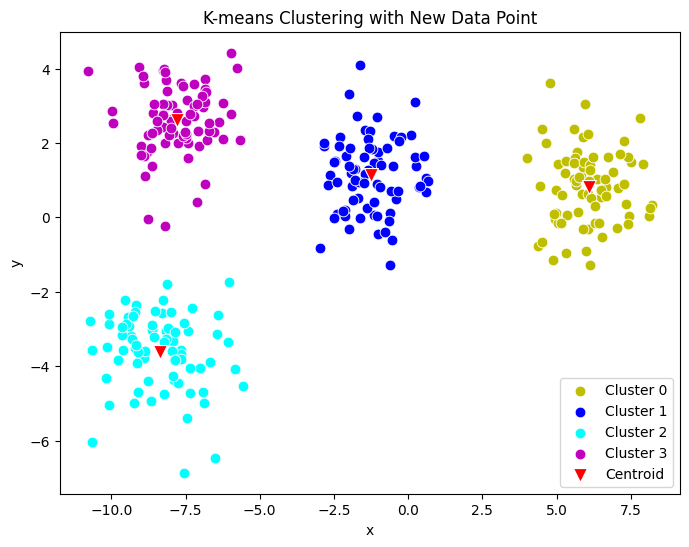

In [92]:
index_min_dis_dav = np.argmin([sublist[2] for sublist in result if len(sublist) > 2])
colors_dict = {0: 'y', 1: 'b', 2: 'cyan', 3: 'm'}
print(f'Chọn lần thử thứ {index_min_dis_dav + 1}')
colors = [colors_dict[i] for i in result[index_min_dis_dav][1]]
plt.figure(figsize= (8, 6))
for i, color in enumerate(np.unique(result[index_min_dis_dav][1])):
    sns.scatterplot(x = dataSet[result[index_min_dis_dav][1] == color][:, 0], 
                y = dataSet[result[index_min_dis_dav][1] == color][:, 1], 
                color=colors_dict[color], s= 60 ,
                label=f'Cluster {color}')
sns.scatterplot(x = result[index_min_dis_dav][0][:, 0], 
                y = result[index_min_dis_dav][0][:, 1],
                color='red', marker='v',
                s = 100,
                label ='Centroid')
plt.title('K-means Clustering with New Data Point')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

#### Câu 7. Tạo thêm 1 điểm dữ liệu bất kỳ, tính xem nó thuộc cụm nào với lần phân cụm tốt nhất ở bước 5

In [93]:
data_point_random = np.random.uniform(np.amin(dataSet , axis= 0),np.amax(dataSet , axis= 0), size= (1,len(dataSet[0])))
predicted_cluter = np.argmin(euclidean_distance(data_point_random, result[index_min_dis_dav][0]))
print(f'Điểm dữ liệu được tạo : {data_point_random} thuộc cụm {predicted_cluter}')

Điểm dữ liệu được tạo : [[-3.80759915  0.9719934 ]] thuộc cụm 1


#### Câu 8. Vẽ tất cả điểm dữ liệu với màu tùy theo cụm, centroid, và điểm đã dự đoán ở trên với màu theo cụm và có marker là kim cương.

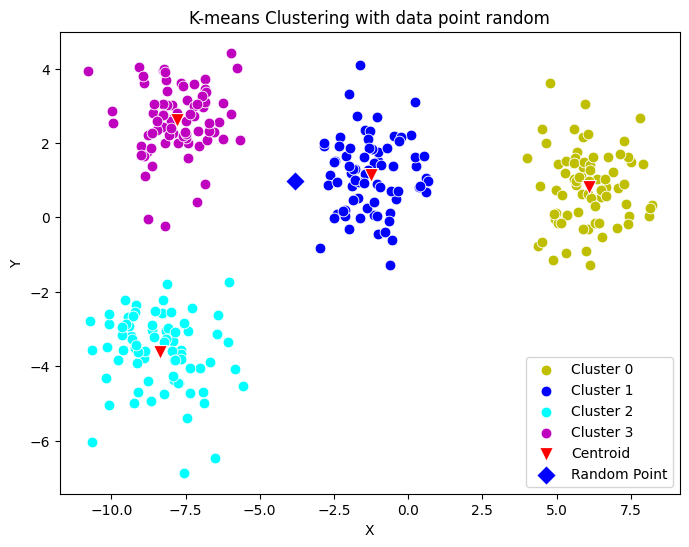

In [94]:
plt.figure(figsize=(8, 6))
for i, color in enumerate(np.unique(result[index_min_dis_dav][1])):
    sns.scatterplot(x = dataSet[result[index_min_dis_dav][1] == color][:, 0], 
                y = dataSet[result[index_min_dis_dav][1] == color][:, 1], 
                color=colors_dict[color], s= 60 ,
                label=f'Cluster {color}')
sns.scatterplot(x = result[index_min_dis_dav][0][:, 0], 
                y = result[index_min_dis_dav][0][:, 1],
                color='red', marker='v',
                s = 100,
                label ='Centroid')
sns.scatterplot(x = [data_point_random[0][0]],
                y = [data_point_random[0][1]],
                color = colors_dict[predicted_cluter],
                marker='D',
                s=100,label='Random Point')
plt.title('K-means Clustering with data point random')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='lower right')
plt.show()